In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/only_road_accidents_data3.csv')

In [ ]:
display(df)

,STATE/UT,YEAR,0-3 hrs. (Night),3-6 hrs. (Night),6-9 hrs (Day),9-12 hrs (Day),12-15 hrs (Day),15-18 hrs (Day),18-21 hrs (Night),21-24 hrs (Night),Total
0,A & N Islands,2001,2,6,29,40,39,40,18,7,181
1,A & N Islands,2002,2,6,22,41,33,33,23,8,168
2,A & N Islands,2003,2,8,31,35,28,36,25,15,180
3,A & N Islands,2004,2,5,29,42,43,43,37,14,215
4,A & N Islands,2005,0,8,27,28,38,42,50,13,206
...,...,...,...,...,...,...,...,...,...,...,...
485,West Bengal,2010,1241,1397,1721,2508,2272,2296,1831,1459,14725
486,West Bengal,2011,1200,1493,1687,2553,2182,2196,1812,1345,14468
487,West Bengal,2012,1346,1511,1837,2831,2328,2268,1966,1521,15608
488,West Bengal,2013,1442,1911,2136,2900,2246,2366,2137,1411,16549


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   STATE/UT           490 non-null    object
 1   YEAR               490 non-null    int64 
 2   0-3 hrs. (Night)   490 non-null    int64 
 3   3-6 hrs. (Night)   490 non-null    int64 
 4   6-9 hrs (Day)      490 non-null    int64 
 5   9-12 hrs (Day)     490 non-null    int64 
 6   12-15 hrs (Day)    490 non-null    int64 
 7   15-18 hrs (Day)    490 non-null    int64 
 8   18-21 hrs (Night)  490 non-null    int64 
 9   21-24 hrs (Night)  490 non-null    int64 
 10  Total              490 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 42.2+ KB


In [ ]:
import warnings 
warnings.filterwarnings('ignore')

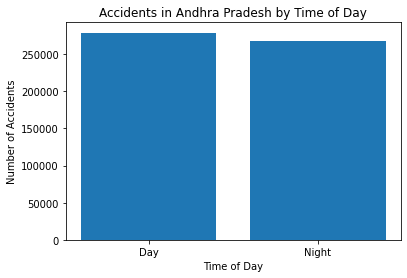

In [ ]:
#1.Find no. of accidents happened during day time & night time in Andhra Pradesh and show them using plot.
andhra_df = df[df['STATE/UT'] == 'Andhra Pradesh']

# Calculate total number of accidents during day and night times
day_accidents = andhra_df['6-9 hrs (Day)'] + andhra_df['9-12 hrs (Day)'] + andhra_df['12-15 hrs (Day)'] + andhra_df['15-18 hrs (Day)']
night_accidents = andhra_df['0-3 hrs. (Night)'] + andhra_df['3-6 hrs. (Night)'] + andhra_df['18-21 hrs (Night)'] + andhra_df['21-24 hrs (Night)']

# Create a bar plot to display the results
plt.bar(['Day', 'Night'], [day_accidents.sum(), night_accidents.sum()])
plt.title('Accidents in Andhra Pradesh by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Accidents')
plt.show()

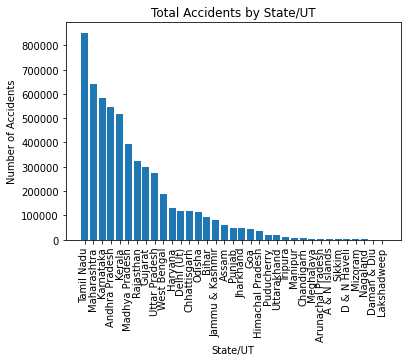

In [ ]:
#2 Find total no. of accidents happened in all states and draw the plot to show the results.
state_accidents = df.groupby('STATE/UT')['Total'].sum().sort_values(ascending=False)
# Create a bar plot to display the results
plt.bar(state_accidents.index, state_accidents.values)
plt.title('Total Accidents by State/UT')
plt.xlabel('State/UT')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#3.Find the accidents happened during early hours in south and display them using subplots.



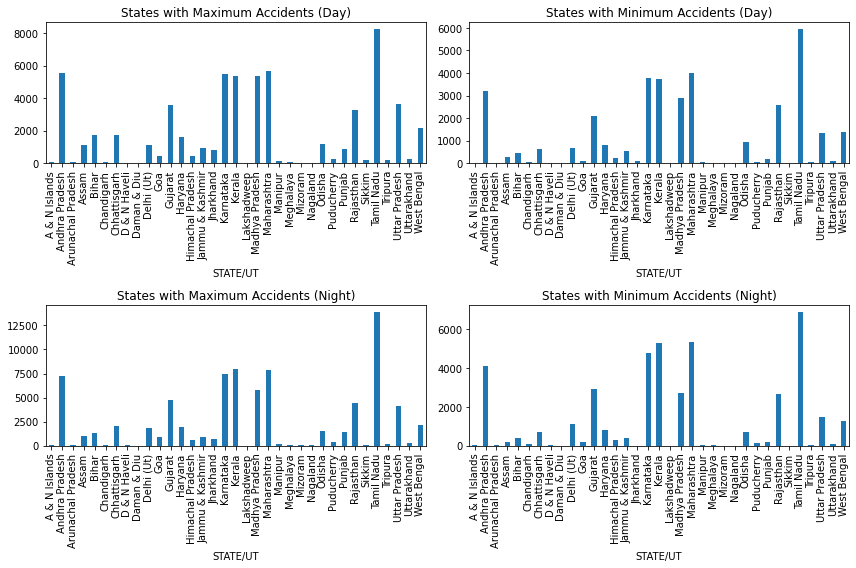

In [ ]:
#4 Find the states with maximum accidents, minimum accidents in each period & show them using plots.
# Get the states with the maximum and minimum number of accidents in each period
max_day = df.groupby("STATE/UT")["6-9 hrs (Day)"].max()
min_day = df.groupby("STATE/UT")["6-9 hrs (Day)"].min()
max_night = df.groupby("STATE/UT")["18-21 hrs (Night)"].max()
min_night = df.groupby("STATE/UT")["18-21 hrs (Night)"].min()

# Plot the results
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
max_day.plot(kind="bar", ax=axs[0, 0], title="States with Maximum Accidents (Day)")
min_day.plot(kind="bar", ax=axs[0, 1], title="States with Minimum Accidents (Day)")
max_night.plot(kind="bar", ax=axs[1, 0], title="States with Maximum Accidents (Night)")
min_night.plot(kind="bar", ax=axs[1, 1], title="States with Minimum Accidents (Night)")
plt.tight_layout()
plt.show()

In [ ]:
#5.Find the states with accidents more than average no. of accidents during day time & night time and show them using plots.


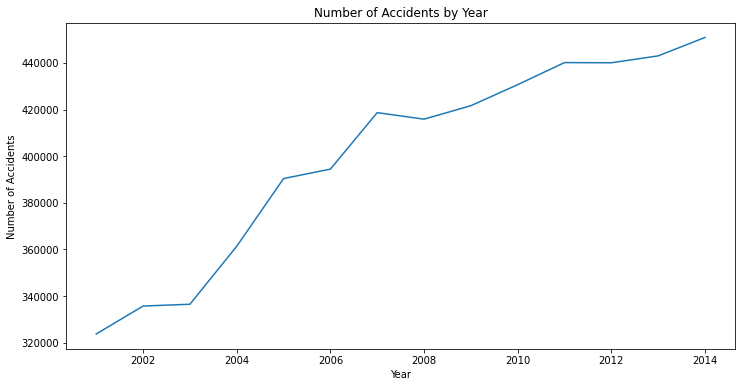

In [ ]:
#6.Find no. of accidents happened in each year and show them using plots.
year_df = df.groupby('YEAR')['Total'].sum().reset_index()

# Create a line plot to show the results
plt.figure(figsize=(12, 6))
plt.plot(year_df['YEAR'], year_df['Total'])
plt.title('Number of Accidents by Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()


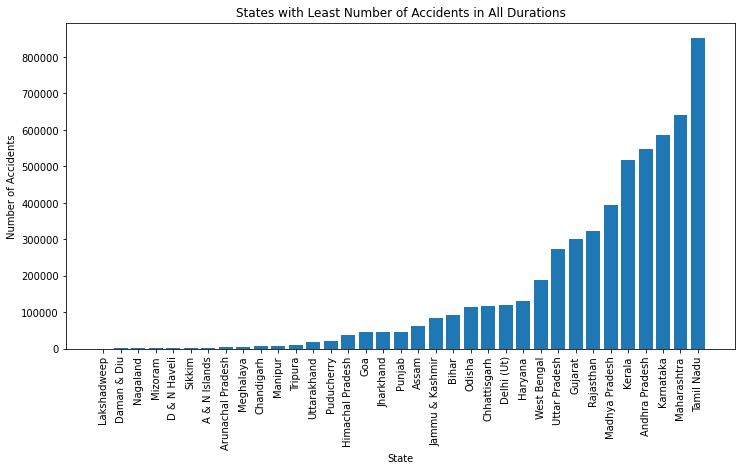

In [ ]:
#7.Find the states with least no. of accidents in all durations and draw plot to show the results.
state_df = df.groupby('STATE/UT')['Total'].sum().reset_index()

# Sort the data by the total number of accidents in ascending order
state_df = state_df.sort_values(by='Total', ascending=True)

# Create a plot to show the results
plt.figure(figsize=(12, 6))
plt.bar(state_df['STATE/UT'], state_df['Total'])
plt.xticks(rotation=90)
plt.title('States with Least Number of Accidents in All Durations')
plt.xlabel('State')
plt.ylabel('Number of Accidents')
plt.show()

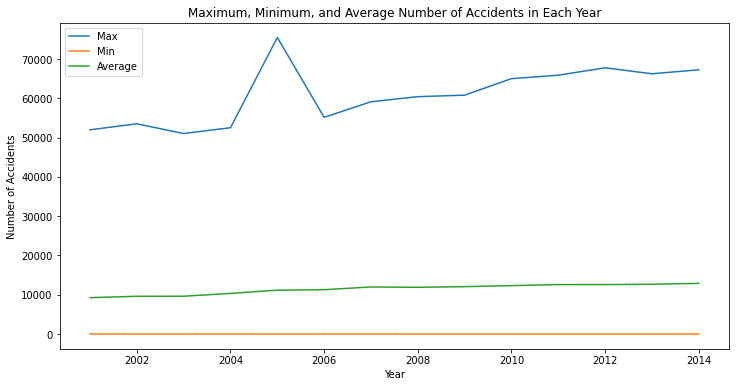

In [ ]:
#8.Find the maximum, minimum & average no. of accidents happened in each year and draw plot to show the results.
year_df = df.groupby('YEAR')['Total'].agg(['max', 'min', 'mean']).reset_index()

# Create a plot to show the results
plt.figure(figsize=(12, 6))
plt.plot(year_df['YEAR'], year_df['max'], label='Max')
plt.plot(year_df['YEAR'], year_df['min'], label='Min')
plt.plot(year_df['YEAR'], year_df['mean'], label='Average')
plt.legend()
plt.title('Maximum, Minimum, and Average Number of Accidents in Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

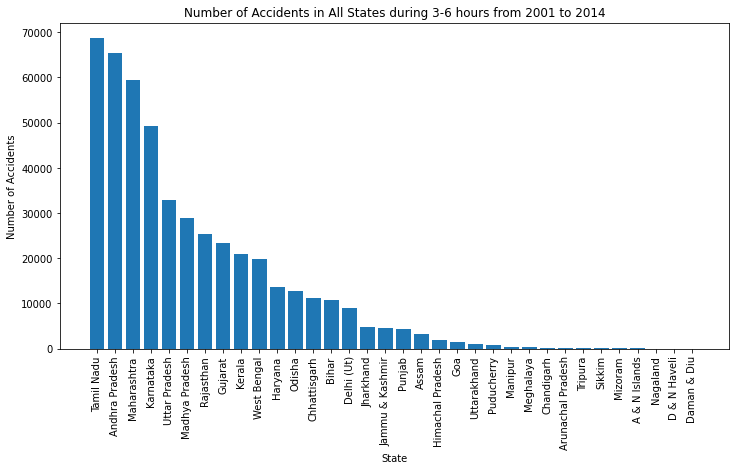

In [ ]:
#9.Find accidents happened in all states during 3-6 hours from 2001 to 2014 and draw plot to show the results.
start_year = 2001
end_year = 2014
period = '3-6 hrs. (Night)'
subset_df = df[(df['YEAR'] >= start_year) & (df['YEAR'] <= end_year) & (df[period] > 0)]

# Group the data by state and sum the number of accidents for each state
state_df = subset_df.groupby('STATE/UT')[period].sum().reset_index()

# Sort the data by the number of accidents in descending order
state_df = state_df.sort_values(by=period, ascending=False)

# Create a plot to show the results
plt.figure(figsize=(12, 6))
plt.bar(state_df['STATE/UT'], state_df[period])
plt.xticks(rotation=90)
plt.title('Number of Accidents in All States during 3-6 hours from 2001 to 2014')
plt.xlabel('State')
plt.ylabel('Number of Accidents')
plt.show()

In [ ]:
#10.Find the max, min & average no. of accidents happened in every duration in each year and draw plots for the states in top in each category.